In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Spikes
- Look at daily machine vends and idenify machines with spikes. E.g. (x-mean)/ 3*std)
- machines with atleast 7 days of data [redacting]
- (x-mean)/ 3*std) > 1


In [2]:
sp= pd.read_csv('/content/DFORE153spk30d.csv')

In [41]:
sp['TxnRnkPct']= sp.Txns.rank(ascending=True, pct=True).round(4)

In [74]:
pctLst= ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%', '90%', '95%', '99%', '99.5%' ,'99.9%', '100%']
pcts= [.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8, .85,.9,.95,.99, .995,.999, 1]

In [75]:
sp.loc[sp.Txns== sp.Txns.max()]

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3,TxnRnkPct
248166,702-HDH,07/28/2021,134273,21458,41384.419541,2.72596,1.362996,0.908668,1.0


In [69]:
100.00*(sp.Txns.max()/sp.Txns.sum())

3.53460595960157

In [72]:
(22+489)/2

255.5

In [71]:
sp.Txns.describe(percentiles=pcts)

count     379692.000000
mean          10.004980
std          559.794297
min            1.000000
5%             1.000000
10%            1.000000
15%            1.000000
20%            1.000000
25%            1.000000
30%            1.000000
35%            1.000000
40%            1.000000
45%            2.000000
50%            2.000000
55%            2.000000
60%            2.000000
65%            2.000000
70%            3.000000
75%            3.000000
80%            3.000000
85%            4.000000
90%            5.000000
95%            7.000000
99%           14.000000
99.5%         22.000000
99.55%        24.000000
99.9%        489.309000
100%      134273.000000
max       134273.000000
Name: Txns, dtype: float64

In [76]:
recs=[]
for i in range(len(pcts)):
  # print(pctLst[i], pcts[i], df2.SumRank.describe(percentiles=[pcts[i]])[pctLst[i]])
  cut= sp.Txns.describe(percentiles=[pcts[i]])[pctLst[i]]
  TotTxnIds= sp.loc[sp.Txns <= cut, 'Txns'].sum()
  print(pctLst[i], pcts[i], cut, sp.loc[sp.TxnRnkPct <= cut, 'Txns'].shape[0], TotTxnIds)
  recs.append([pctLst[i], pcts[i], cut, TotTxnIds])


5% 0.05 1.0 379692 162762
10% 0.1 1.0 379692 162762
15% 0.15 1.0 379692 162762
20% 0.2 1.0 379692 162762
25% 0.25 1.0 379692 162762
30% 0.3 1.0 379692 162762
35% 0.35 1.0 379692 162762
40% 0.4 1.0 379692 162762
45% 0.45 2.0 379692 348028
50% 0.5 2.0 379692 348028
55% 0.55 2.0 379692 348028
60% 0.6 2.0 379692 348028
65% 0.65 2.0 379692 348028
70% 0.7 3.0 379692 502096
75% 0.75 3.0 379692 502096
80% 0.8 3.0 379692 502096
85% 0.85 4.0 379692 613012
90% 0.9 5.0 379692 690767
95% 0.95 7.0 379692 783547
99% 0.99 14.0 379692 895793
99.5% 0.995 22.0 379692 927052
99.9% 0.999 489.3090000000666 379692 1062150
100% 1 134273.0 379692 3798811


In [94]:
sp.loc[sp.Txns > sp.Txns.describe(percentiles=[.999]).loc['99.9%']].machine_id.unique()

array(['017-GXB', '022-GGF', '026-JKM', '030-BPV', '045-DSG', '046-BYY',
       '047-GDY', '049-DJS', '071-GSD', '074-BBR', '097-FPX', '099-FPX',
       '099-HFM', '100-FPX', '101-CLK', '102-FNZ', '105-GRY', '107-HPN',
       '124-GMZ', '161-DCT', '164-HPK', '184-GSC', '195-HRH', '196-HRX',
       '203-CTW', '204-FSG', '207-DHX', '208-HHD', '235-BYY', '235-GRV',
       '265-DJM', '268-GWP', '299-GGG', '299-GNB', '301-FNP', '308-FRN',
       '320-HDT', '350-GHV', '350-HFT', '358-HFT', '398-GMF', '399-CRV',
       '402-JJC', '403-JJC', '419-GHT', '432-GGG', '444-GBT', '466-BLC',
       '467-GMJ', '468-BZP', '472-BPK', '474-GTG', '474-GXK', '475-GLG',
       '476-GWT', '484-BLC', '488-HWT', '491-DJK', '510-CKD', '514-BLC',
       '514-HLV', '526-GRZ', '547-GXM', '562-GSD', '577-JPF', '591-HKY',
       '599-JDV', '639-GYT', '649-JGK', '652-CRV', '660-BBT', '665-BZH',
       '690-GXH', '702-HDH', '705-CTV', '705-GYR', '706-FTB', '708-BZW',
       '709-DCY', '712-DCY', '721-DDC', '722-FPL', 

In [65]:
fin= pd.DataFrame.from_records(recs)
fin.columns=['PercentileLabel', 'Percentile', 'PercentileValueCutOff', 'TotalTxnIds']
fin['TotalTxnIds%']= fin.TotalTxnIds/ fin.TotalTxnIds.max()

In [105]:
fin['PctBar']= fin['TotalTxnIds%']- fin['TotalTxnIds%'].shift()

In [107]:
fin.PctBar.fillna(0, inplace=True)

In [108]:
fin

,PercentileLabel,Percentile,PercentileValueCutOff,TotalTxnIds,TotalTxnIds%,PctBar
0,5%,0.050,1.000,162762,0.042846,0.000000
1,10%,0.100,1.000,162762,0.042846,0.000000
2,15%,0.150,1.000,162762,0.042846,0.000000
3,20%,0.200,1.000,162762,0.042846,0.000000
4,25%,0.250,1.000,162762,0.042846,0.000000
5,30%,0.300,1.000,162762,0.042846,0.000000
6,35%,0.350,1.000,162762,0.042846,0.000000
7,40%,0.400,1.000,162762,0.042846,0.000000
8,45%,0.450,2.000,348028,0.091615,0.048769
9,50%,0.500,2.000,348028,0.091615,0.000000


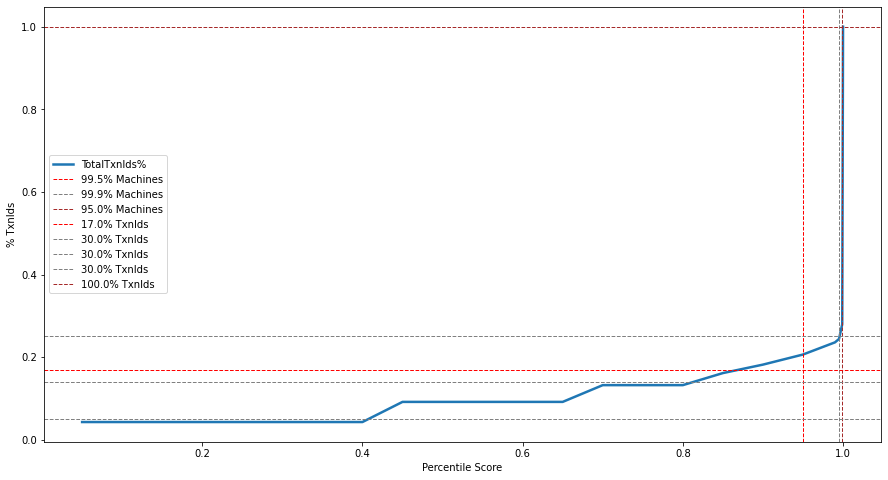

In [110]:
fin.plot('Percentile', 'TotalTxnIds%', kind= 'line', figsize=(15,8), linewidth=2.5)
# fin.plot('Percentile', 'PctBar', kind= 'bar', figsize=(15,8), linewidth=2.5)
plt.xlabel('Percentile Score')
plt.ylabel('% TxnIds')
plt.axvline(x=.95, color='red', linestyle='--', label='99.5% Machines', linewidth=1)
plt.axvline(x=.995, color='gray', linestyle='--', label='99.9% Machines', linewidth=1)
plt.axvline(x=.999, color='brown', linestyle='--', label='95.0% Machines', linewidth=1)
plt.axhline(y=.17, color='red', linestyle='--', label='17.0% TxnIds', linewidth=1)
plt.axhline(y=.25, color='gray', linestyle='--', label='30.0% TxnIds', linewidth=1)
plt.axhline(y=.14, color='gray', linestyle='--', label='30.0% TxnIds', linewidth=1)
plt.axhline(y=.05, color='gray', linestyle='--', label='30.0% TxnIds', linewidth=1)
plt.axhline(y=1, color='brown', linestyle='--', label='100.0% TxnIds', linewidth=1)
plt.legend()

In [3]:
sp.describe()

,Txns,means,standev,std1,std2,std3
count,379692.000000,379692.000000,376596.000000,376596.000000,376596.000000,376596.000000
mean,10.004980,9.548850,12.970813,0.191108,0.124775,0.093028
std,559.794297,389.754967,419.308531,0.588064,0.362562,0.264015
min,1.000000,1.000000,0.000000,-2.106264,-1.118577,-0.761492
25%,1.000000,1.000000,0.917663,-0.179492,-0.096274,-0.065774
50%,2.000000,2.000000,1.356934,0.000000,0.000000,0.000000
75%,3.000000,2.000000,2.047763,0.500000,0.326693,0.241750
max,134273.000000,58198.000000,42917.155826,5.379912,2.691949,1.795076


The following machine installation is 3 days old and shows really very high TXns volume in those 3 days

In [ ]:
sp.loc[sp.means== sp.means.max()]

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3
369769,LTH-747,08/14/2021,52640,58198,19546.079334,-0.284339,-0.142173,-0.094783
369770,LTH-747,08/15/2021,79922,58198,19546.079334,1.111368,0.555698,0.370469
369771,LTH-747,08/16/2021,42034,58198,19546.079334,-0.826927,-0.413474,-0.275652


In [ ]:
sp['gt_std3']= sp.std3 > 1
sp1= sp.loc[sp.gt_std3 ==True]
sp1.describe()

,Txns,means,standev,std1,std2,std3
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,192.444865,15.452911,43.630449,2.757360,1.600759,1.130878
std,1796.807927,115.710089,401.315124,0.507078,0.201771,0.122755
min,4.000000,1.000000,0.655896,1.811708,1.297695,1.000069
25%,8.000000,2.000000,1.685214,2.421203,1.461952,1.040179
50%,11.000000,2.000000,2.384077,2.658217,1.545502,1.096370
75%,17.000000,3.000000,3.733425,2.961566,1.685823,1.183857
max,50937.000000,2559.000000,11093.276862,5.379912,2.691949,1.795076


In [ ]:
#1936	8194.460848
sp.loc[sp.machine_id== sp1.loc[sp1.Txns== sp1.Txns.max(),'machine_id'].values[0]]

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3,gt_std3
36544,099-HFM,07/26/2021,4,2559,11093.276862,-0.230299,-0.115155,-0.076771,False
36545,099-HFM,07/29/2021,4,2559,11093.276862,-0.230299,-0.115155,-0.076771,False
36546,099-HFM,07/30/2021,3,2559,11093.276862,-0.230389,-0.115200,-0.076801,False
36547,099-HFM,07/31/2021,14,2559,11093.276862,-0.229398,-0.114704,-0.076470,False
36548,099-HFM,08/01/2021,50937,2559,11093.276862,4.360627,2.180412,1.453630,True
36549,099-HFM,08/02/2021,7,2559,11093.276862,-0.230029,-0.115019,-0.076681,False
36550,099-HFM,08/04/2021,9,2559,11093.276862,-0.229848,-0.114929,-0.076621,False
36551,099-HFM,08/05/2021,2,2559,11093.276862,-0.230479,-0.115245,-0.076831,False
36552,099-HFM,08/06/2021,4,2559,11093.276862,-0.230299,-0.115155,-0.076771,False
36553,099-HFM,08/07/2021,35,2559,11093.276862,-0.227505,-0.113757,-0.075839,False


In [ ]:
sp1.groupby('machine_id')['gt_std3'].sum()[sp1.groupby('machine_id')['gt_std3'].sum() > 1]

machine_id
537-FRW    2
901-GYM    2
934-FJD    2
Name: gt_std3, dtype: int64

In [ ]:
# sp1.loc[sp1.Txns== sp1.Txns.max(),'machine_id'].values[0]

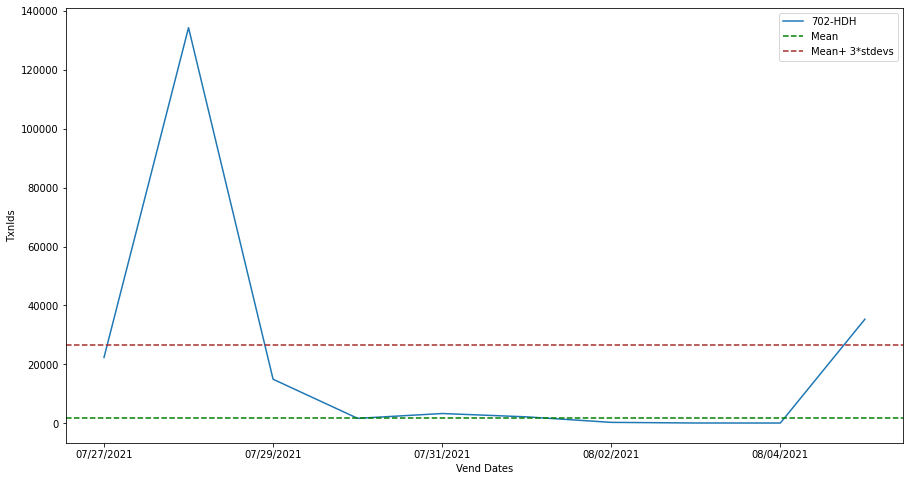

In [78]:
#702-HDH
sp.loc[sp.machine_id== '702-HDH'].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8),
                                                                                       label= '702-HDH')
plt.axhline(y=1936, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')

plt.axhline(y=1936+ 3*8194.460848, color='brown', linestyle='--',label='Mean+ 3*stdevs')
plt.legend()

## Max Txns

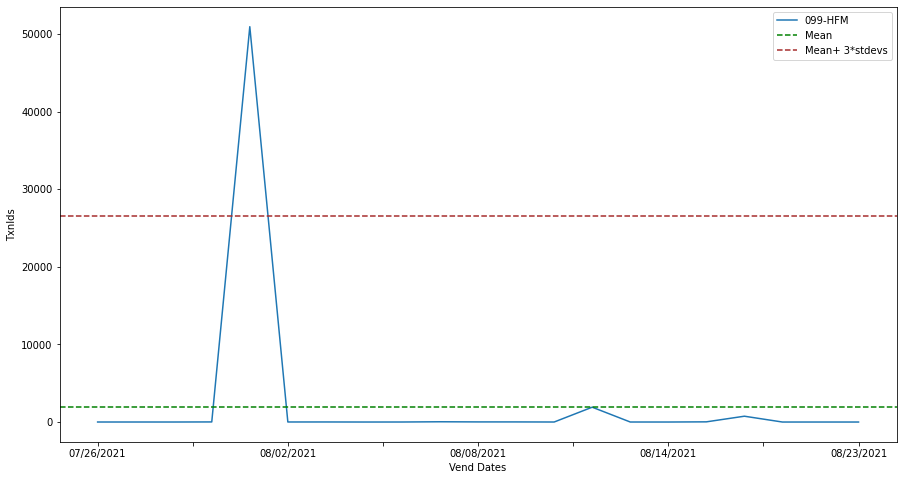

In [ ]:
sp.loc[sp.machine_id== sp1.loc[sp1.Txns== sp1.Txns.max(),'machine_id'].values[0]].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8),
                                                                                       label= sp1.loc[sp1.Txns== sp1.Txns.max(),'machine_id'].values[0])
plt.axhline(y=1936, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')

plt.axhline(y=1936+ 3*8194.460848, color='brown', linestyle='--',label='Mean+ 3*stdevs')
plt.legend()

In [ ]:
sp.loc[sp.machine_id== ].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8),
                                                                                       label= sp1.loc[sp1.Txns== sp1.Txns.max(),'machine_id'].values[0])
plt.axhline(y=1936, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')

plt.axhline(y=1936+ 3*8194.460848, color='brown', linestyle='--',label='Mean+ 3*stdevs')
plt.legend()

In [ ]:
sp1.loc[sp1.standev== sp1.standev.max(), 'machine_id'].values[0]

'099-HFM'

## Max Std Dev

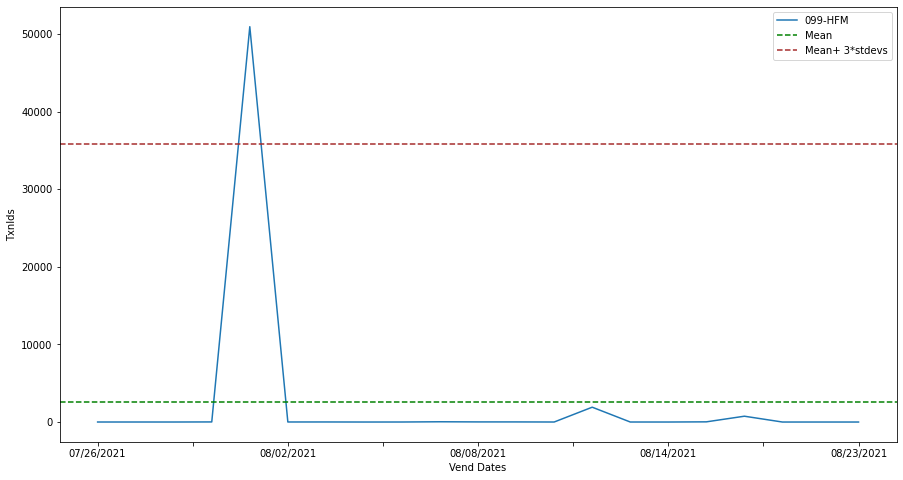

In [ ]:
sp.loc[sp.machine_id== sp1.loc[sp1.standev== sp1.standev.max(), 'machine_id'].values[0]].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8),
                                                                                              label=sp1.loc[sp1.standev== sp1.standev.max(), 'machine_id'].values[0] )
plt.axhline(y=2559, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')
plt.axhline(y=2559+ 3*11093.276862, color='brown', linestyle='--', label='Mean+ 3*stdevs')
plt.legend()

In [ ]:
sp.loc[sp.machine_id== '000-BWN']

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3,gt_std3
72,000-BWN,07/28/2021,1,1,1.55505,0.000000,0.000000,0.000000,False
73,000-BWN,07/30/2021,1,1,1.55505,0.000000,0.000000,0.000000,False
74,000-BWN,07/31/2021,6,1,1.55505,1.956909,1.216515,0.882589,False
75,000-BWN,08/02/2021,1,1,1.55505,0.000000,0.000000,0.000000,False
76,000-BWN,08/06/2021,1,1,1.55505,0.000000,0.000000,0.000000,False
77,000-BWN,08/11/2021,1,1,1.55505,0.000000,0.000000,0.000000,False
78,000-BWN,08/14/2021,1,1,1.55505,0.000000,0.000000,0.000000,False
79,000-BWN,08/15/2021,1,1,1.55505,0.000000,0.000000,0.000000,False
80,000-BWN,08/17/2021,3,1,1.55505,0.782763,0.486606,0.353036,False
81,000-BWN,08/20/2021,2,1,1.55505,0.391382,0.243303,0.176518,False


# Thorns

In [ ]:
m1= sp1.groupby('machine_id')['gt_std3'].sum()[sp1.groupby('machine_id')['gt_std3'].sum() > 1].index[1]

In [ ]:
sp1.groupby('machine_id')['gt_std3'].sum()[sp1.groupby('machine_id')['gt_std3'].sum() > 1]

machine_id
537-FRW    2
901-GYM    2
934-FJD    2
Name: gt_std3, dtype: int64

In [ ]:
# sp1.loc[sp1.machine_id== m1]

In [ ]:
sp.loc[sp.machine_id== m1, 'Txns'].describe(percentiles=[.999])

count    27.000000
mean      3.629630
std       4.170853
min       1.000000
50%       3.000000
99.9%    17.000000
max      17.000000
Name: Txns, dtype: float64

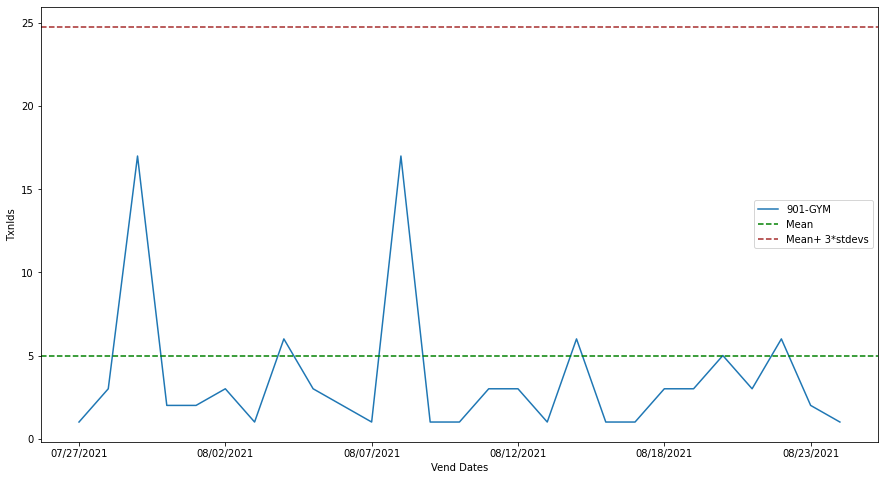

In [ ]:
sp.loc[sp.machine_id== m1].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8), label= m1)
plt.axhline(y=5, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')
plt.axhline(y=5+ 3*6.592887, color='brown', linestyle='--', label='Mean+ 3*stdevs')
plt.legend()

In [ ]:
gt3= sp.groupby('machine_id')['gt_std3'].sum().reset_index()
std3= sp.groupby('machine_id')['std3', 'Txns'].agg(['min', 'max']).reset_index()
std3['MaxMinDiff']= std3.loc[:, 'std3']['max']- std3.loc[:, 'std3']['min']
std3['MaxMinDiff'].describe(percentiles=[.05,.25,.75,.95,.99,.999])

count    27327.000000
mean         0.714344
std          0.339109
min          0.000000
5%           0.000000
25%          0.500000
50%          0.748664
75%          0.946964
95%          1.223704
99%          1.426597
99.9%        1.652001
max          1.863399
Name: MaxMinDiff, dtype: float64

In [ ]:
std3.loc[std3.machine_id=='419-GHT']

machine_id      std3           Txns         MaxMinDiff
                       min       max  min     max           
11432    419-GHT -0.308243  0.647755    1  123088   0.955997

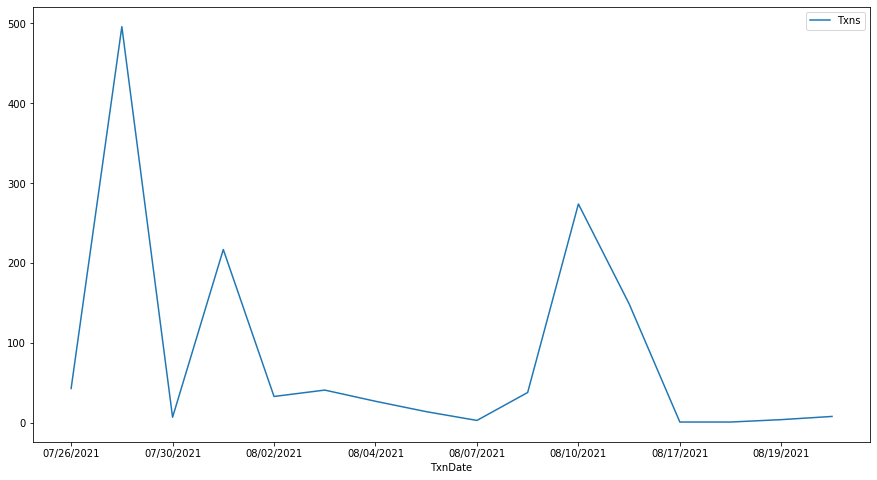

In [ ]:
# sp.loc[sp.machine_id== '716-BLB']
sp.loc[sp.machine_id== '444-GBT'].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8))
# plt.axhline(y=3, color='green', linestyle='--', label='Mean')
# plt.xlabel('Vend Dates')
# plt.ylabel('TxnIds')
# plt.axhline(y=3+ 3*15.944683, color='brown', linestyle='--', label='Mean+ 3*stdevs')
plt.legend()

In [ ]:
# std3.loc[std3.MaxMinDiff > 3.03, 'machine_id']
# gt3.gt_std3.value_counts()

# Aggregate Measures



In [55]:
df= pd.read_csv('/content/DFORE153D30d.csv')
len(df.machine_id)-len(df.machine_id.unique())

4779

In [56]:
df.sort_values(['machine_id', 'TimeLength'], ascending= False, inplace= True)
df.drop_duplicates('machine_id', keep='first', inplace= True)
df.loc[df.machine_id=='708-BZW']

,machine_id,machine_type,controller_type,NonCashTotTxn,BaseCycles,TopOffs,TotCorr,TotTxn,LastTxnDate,FirstTxnDate,TimeLength
22959,708-BZW,Dryer,hybrid,0,0,349110,349110,349110,2021-08-16 18:54:52.0000000,2021-07-31 08:17:38.0000000,17


In [ ]:
df['Txn2CorrRatio']= df['TotTxn'].divide(df['TotCorr'])
df['TopOffProportion']= df.TopOffs.divide(df['BaseCycles']+df.TopOffs)
df['TxnDailyAvg']= df.TotTxn.divide(df.TimeLength)
df['cash2AllTxnRatio']= (df.TotTxn-df.NonCashTotTxn)/df.TotTxn

In [ ]:
std3.columns= ['machine_id', 'std3_min', 'std3_max', 'txns_min', 'txns_max', 'MaxMinDiff']
# df2= df.merge(std3, how= 'left', left_on='machine_id', right_on='machine_id')

## Features:
- `'Txn2CorrRatio'`: TxnIds per Correlation_ID
- `'TopOffProportion'`: Proportion of Top off at a machine
- `'TxnDailyAvg'`: 
- `'cash2AllTxnRatio'`: 
- `'std3'`: 

In [ ]:
df2= df.merge(std3, how= 'left', left_on='machine_id', right_on='machine_id')
print(df2.columns)
features= [ 'TxnDailyAvg','TopOffProportion','MaxMinDiff','Txn2CorrRatio', 'cash2AllTxnRatio']
df2.dropna(inplace=True)
print(df2.shape)
df2= df2.loc[df2.controller_type!= 'unknown']

Index(['machine_id', 'machine_type', 'controller_type', 'NonCashTotTxn',
       'BaseCycles', 'TopOffs', 'TotCorr', 'TotTxn', 'LastTxnDate',
       'FirstTxnDate', 'TimeLength', 'Txn2CorrRatio', 'TopOffProportion',
       'TxnDailyAvg', 'cash2AllTxnRatio', 'std3_min', 'std3_max', 'txns_min',
       'txns_max', 'MaxMinDiff'],
      dtype='object')
(13474, 20)


In [ ]:
# comp_pct= df2.loc[:,features].rank(ascending=False, pct=False).sum(axis=1).rank(ascending=False, pct=True)

In [ ]:
df2.controller_type.value_counts(dropna=False)

MDC       5482
ACA       4251
hybrid    2931
QPRO       661
ACA-A1      81
Maytag      68
Name: controller_type, dtype: int64

## Algorithm 1

In [ ]:
df2['SumRank']= df2.groupby(['machine_type', 'controller_type'])[features].rank("dense", ascending=True, pct=True).sum(axis=1)

In [ ]:
pctLst= ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%', '90%', '95%', '99%', '99.5%', '99.9%', '100%']
pcts= [.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8, .85,.9,.95,.99, .995,.999, 1]

In [ ]:
recs=[]
for i in range(len(pcts)):
  # print(pctLst[i], pcts[i], df2.SumRank.describe(percentiles=[pcts[i]])[pctLst[i]])
  cut= df2.SumRank.describe(percentiles=[pcts[i]])[pctLst[i]]
  TotTxnIds= df2.loc[df2.SumRank <= cut, 'TotTxn'].sum()
  print(pctLst[i], pcts[i], cut, TotTxnIds)
  recs.append([pctLst[i], pcts[i], cut, TotTxnIds])

5% 0.05 0.3041123631429699 4266
10% 0.1 0.5696923460144598 12258
15% 0.15 0.7455197295055367 21162
20% 0.2 0.9270566462601545 32094
25% 0.25 1.0645693422791045 43889
30% 0.3 1.147599341543847 52897
35% 0.35 1.259942915317785 64722
40% 0.4 1.3513627662082333 76691
45% 0.45 1.475669049989897 91069
50% 0.5 1.5896333655827244 107256
55% 0.55 1.7106996423725 124823
60% 0.6 1.8482057812996588 143425
65% 0.65 2.0065030043861096 163810
70% 0.7 2.177826145972749 184751
75% 0.75 2.4175678087832857 207488
80% 0.8 2.6900083951511142 233837
85% 0.85 2.9970439600770398 260819
90% 0.9 3.3250590577466994 288628
95% 0.95 3.7312215201345147 337741
99% 0.99 4.364176487012697 540937
99.5% 0.995 4.6040880114547 687495
99.9% 0.999 4.913315493899216 1431450
100% 1 4.979920788431427 1812767


In [ ]:
fin= pd.DataFrame.from_records(recs)
fin.columns=['PercentileLabel', 'Percentile', 'PercentileValueCutOff', 'TotalTxnIds']
fin['TotalTxnIds%']= fin.TotalTxnIds/ fin.TotalTxnIds.max()

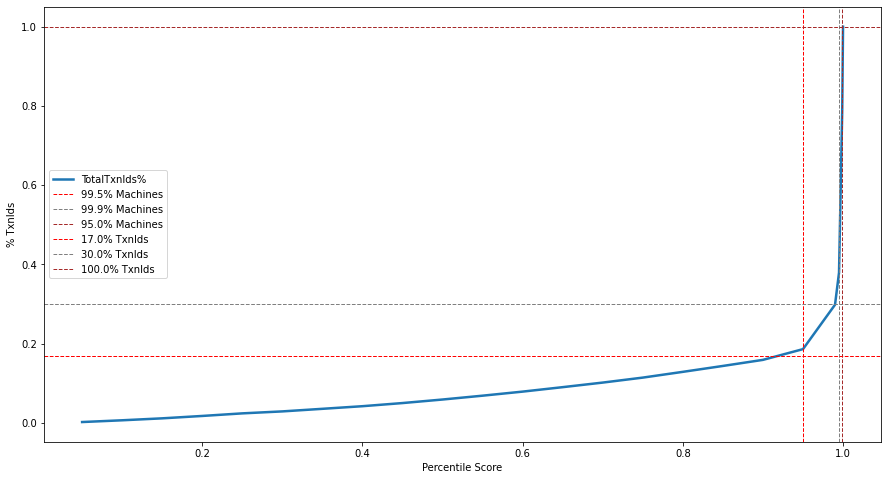

In [ ]:
fin.plot('Percentile', 'TotalTxnIds%', kind= 'line', figsize=(15,8), linewidth=2.5)
plt.xlabel('Percentile Score')
plt.ylabel('% TxnIds')
plt.axvline(x=.95, color='red', linestyle='--', label='99.5% Machines', linewidth=1)
plt.axvline(x=.995, color='gray', linestyle='--', label='99.9% Machines', linewidth=1)
plt.axvline(x=.999, color='brown', linestyle='--', label='95.0% Machines', linewidth=1)
plt.axhline(y=.17, color='red', linestyle='--', label='17.0% TxnIds', linewidth=1)
plt.axhline(y=.3, color='gray', linestyle='--', label='30.0% TxnIds', linewidth=1)
plt.axhline(y=1, color='brown', linestyle='--', label='100.0% TxnIds', linewidth=1)
plt.legend()

In [ ]:
cut95= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['95%']
cut99= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['99%']
cut995= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['99.5%']
cut999= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['99.9%']
df2.loc[df2.SumRank > cut95, 'pct_flg']= '>95pct'
df2.loc[df2.SumRank > cut99, 'pct_flg']= '>99pct'
df2.loc[df2.SumRank > cut995, 'pct_flg']= '>99.5pct'
df2.loc[df2.SumRank > cut999, 'pct_flg']= '>99.9pct'
df2.pct_flg.fillna('<=95pct', inplace=True)

In [ ]:
map_dict= dict(zip(df2.pct_flg.unique().tolist(), ['5. Not Rogue', '4. Low Risk', '2. High Risk', '1. High Risk- Critical', '3. Moderate Risk']))
df2['priority']= df2.pct_flg.map(map_dict)
df2.priority.value_counts()

5. Not Rogue              12800
4. Low Risk                 539
2. High Risk                 67
1. High Risk- Critical       54
3. Moderate Risk             14
Name: priority, dtype: int64

In [ ]:
pd.crosstab(df2.controller_type, df2.priority, margins=True)

priority,1. High Risk- Critical,2. High Risk,3. Moderate Risk,4. Low Risk,5. Not Rogue,All
controller_type,,,,,,
ACA,18,21,4,171,4037,4251
ACA-A1,1,0,0,4,76,81
MDC,10,14,3,184,5271,5482
Maytag,1,0,0,5,62,68
QPRO,4,5,1,25,626,661
hybrid,20,27,6,150,2728,2931
All,54,67,14,539,12800,13474


In [ ]:
df2.loc[df2.SumRank >= df2.SumRank.describe(percentiles=[.99])['99%'],'machine_id'].to_csv('A1 MchineIds 99pct cutoff.txt')

In [ ]:
df2.loc[df2.SumRank > .99].controller_type.value_counts()

MDC       4342
ACA       3022
hybrid    2536
QPRO       495
ACA-A1      75
Maytag      59
Name: controller_type, dtype: int64

In [ ]:
df2.loc[df2.SumRank > .999, 'machine_id']

0        ZZV-448
1        ZZS-022
2        ZZP-165
6        ZXP-965
7        ZXN-840
          ...   
30354    000-CXH
30356    000-CRZ
30358    000-BWN
30359    000-BTN
30361    000-BMD
Name: machine_id, Length: 10501, dtype: object

## BrightAI list

In [ ]:
bf= pd.read_csv('/content/BadActors.csv')

In [ ]:
bf.columns

Index(['Date_Noticed', 'Date_Added', 'aiHubId', 'licensePlate', 'locationId',
       'roomId', 'Reason', 'Present_UDM', 'is_latest'],
      dtype='object')

In [ ]:
bf.drop_duplicates('licensePlate', keep= 'first', inplace=True)

In [ ]:
bf['Spams']= bf.Reason.str.lower().str.contains('spam')

In [ ]:
df3= df2.merge(bf.loc[:,['licensePlate', 'Spams']], how= 'left', left_on='machine_id', right_on='licensePlate')

In [ ]:
df3.Spams.fillna('Not in BrightAI list', inplace=True)

In [ ]:
pd.crosstab(df3.controller_type, df3.priority)

priority,1. High Risk- Critical,2. High Risk,3. Moderate Risk,4. Low Risk,5. Not Rogue
controller_type,,,,,
ACA,18,21,4,171,4037
ACA-A1,1,0,0,4,76
MDC,10,14,3,184,5271
Maytag,1,0,0,5,62
QPRO,4,5,1,25,626
hybrid,20,27,6,150,2728


In [ ]:
df2.controller_type.value_counts()

MDC       5482
ACA       4251
hybrid    2931
QPRO       661
ACA-A1      81
Maytag      68
Name: controller_type, dtype: int64

## Algorithm 2

In [ ]:
features

['TxnDailyAvg',
 'TopOffProportion',
 'MaxMinDiff',
 'Txn2CorrRatio',
 'cash2AllTxnRatio']

In [ ]:
df.groupby(['machine_type', 'controller_type']).size()

machine_type  controller_type
Dryer         ACA                1789
              ACA-A1                3
              MDC                3394
              Maytag               42
              QPRO                289
              hybrid             1863
Washer        ACA                2707
              ACA-A1               85
              MDC                2393
              Maytag               37
              QPRO                407
              hybrid             1766
dtype: int64

In [ ]:
df2= df2.loc[df2.controller_type!= 'unknown']

In [ ]:
featRank= []
for f in features:
  df2[f+'_rnk']= pd.qcut(df2.loc[:, f].rank(method='first', ascending= True), 100, labels=range(100))
  featRank.append(f+'_rnk')
  # df2['NumRnkCat']= None
# df2['NumRnkSum']= 0
  # df2['NumRnkCat']= df2['NumRnkCat']+df2[f+'_rnk'].astype(str)+'|'
  # df2['NumRnkSum']= df2['NumRnkSum']+ df2[f+'_rnk']

In [ ]:
df2['NumRnkSum']= df2.loc[:, featRank].sum(axis=1)

In [ ]:
df2['NumRnkCat']= df2.loc[:, featRank].astype('str').agg('|'.join, axis=1)

In [ ]:
df2['NumRnkSumPct']= df2['NumRnkSum'].rank(ascending=True, pct=True)

In [ ]:
df2.loc[df2.NumRnkSumPct> .99, 'machine_id'].to_csv('A2 MchineIds 99pct cutoff.txt.csv')

In [ ]:
df2.loc[df2.NumRnkSumPct> .995, ['machine_id', 'NumRnkCat']]

,machine_id,NumRnkCat
2195,987-FRS,98|90|96|98|76
2645,973-BMT,99|95|99|99|74
3517,939-GDR,99|94|91|99|77
3536,938-GDR,99|94|94|99|77
3895,924-HTL,99|96|99|99|77
...,...,...
28934,048-HGG,82|85|99|97|99
29047,044-HGG,90|84|99|96|99
29455,030-BPV,99|96|94|99|74
29869,015-HMK,90|78|97|94|99


In [ ]:
df2.groupby(['machine_type', 'controller_type'])[features].rank("dense", ascending=True, pct=True).sum(axis=1)

0        3.054174
1        2.344416
2        2.115273
6        1.459773
7        2.084739
           ...   
30355    0.720662
30356    1.083697
30358    2.163804
30359    2.257657
30361    1.033857
Length: 13474, dtype: float64

In [ ]:
recs=[]
for i in range(len(pcts)):
  # print(pctLst[i], pcts[i], df2.SumRank.describe(percentiles=[pcts[i]])[pctLst[i]])
  cut= df2.NumRnkSumPct.describe(percentiles=[pcts[i]])[pctLst[i]]
  TotTxnIds= df2.loc[df2.NumRnkSumPct <= cut, 'TotTxn'].sum()
  print(pctLst[i], pcts[i], cut, TotTxnIds)
  recs.append([pctLst[i], pcts[i], cut, TotTxnIds])

5% 0.05 0.05057889268220277 3484
10% 0.1 0.10041561525901736 8163
15% 0.15 0.1489164316461333 13837
20% 0.2 0.20016327742318646 20659
25% 0.25 0.25163277423185393 30111
30% 0.3 0.30195190737717087 39449
35% 0.35 0.35167730443817724 49864
40% 0.4 0.3992875166988274 61841
45% 0.45 0.4518331601603087 77384
50% 0.5 0.5011132551580822 93467
55% 0.55 0.5502449161347781 110374
60% 0.6 0.6016401959329079 129582
65% 0.65 0.6509202909306813 148517
70% 0.7 0.7002003859284548 168941
75% 0.75 0.7500371085052694 306523
80% 0.8 0.8008015437138192 333235
85% 0.85 0.8494136856167434 454486
90% 0.9 0.9001410123200237 487851
95% 0.95 0.9499035178862996 924957
99% 0.99 0.9899064865667211 1021840
99.5% 0.995 0.9948048092622829 1724072
99.9% 0.999 0.9989609618524566 1780011
100% 1 1.0 1812767


In [ ]:
fin1= pd.DataFrame.from_records(recs)
fin1.columns=['PercentileLabel', 'Percentile', 'PercentileValueCutOff', 'TotalTxnIds']
fin1['TotalTxnIds%']= fin.TotalTxnIds/ fin.TotalTxnIds.max()

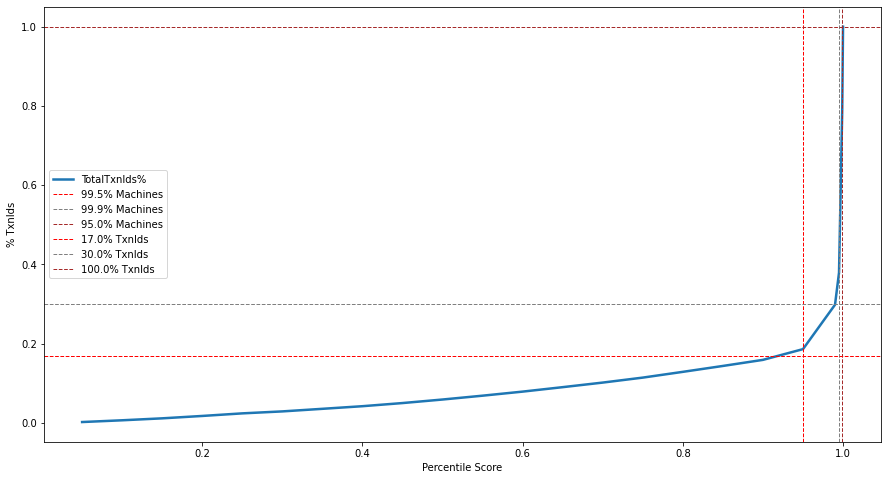

In [ ]:
fin1.plot('Percentile', 'TotalTxnIds%', kind= 'line', figsize=(15,8), linewidth=2.5)
plt.xlabel('Percentile Score')
plt.ylabel('% TxnIds')
plt.axvline(x=.95, color='red', linestyle='--', label='99.5% Machines', linewidth=1)
plt.axvline(x=.995, color='gray', linestyle='--', label='99.9% Machines', linewidth=1)
plt.axvline(x=.999, color='brown', linestyle='--', label='95.0% Machines', linewidth=1)
plt.axhline(y=.17, color='red', linestyle='--', label='17.0% TxnIds', linewidth=1)
plt.axhline(y=.3, color='gray', linestyle='--', label='30.0% TxnIds', linewidth=1)
plt.axhline(y=1, color='brown', linestyle='--', label='100.0% TxnIds', linewidth=1)
plt.legend()

## Segment Cohorts

In [ ]:
df3=df2.loc[df2.machine_type== 'Dryer'].groupby('controller_type')[features].describe(percentiles=pcts).stack(level=0)

In [ ]:
df4=df2.loc[df2.machine_type== 'Washer'].groupby('controller_type')[features].describe(percentiles=pcts).stack(level=0)

In [ ]:
# df4

In [ ]:
df5=df2.groupby(['machine_type', 'controller_type'])[features].describe(percentiles=pcts).stack(level=0).loc[:,pctLst]

In [ ]:
df6= pd.DataFrame(index=df5.index)

In [ ]:
df2.fillna(0, inplace=True)

### Algorithm 3

In [ ]:
df5.loc[m,c,f].loc['99.5%']

In [ ]:
for f in features:
  df2[f+'_flg']= 0
  for row in df2.items():
      print(row[])
      

In [ ]:
df2['AllFlags']=df2.loc[:,['Txn2CorrRatio_flg', 'TopOffProportion_flg', 'TxnDailyAvg_flg', 'cash2AllTxnRatio_flg', 'gt_std3_flg']].sum(axis=1)

In [ ]:
df2.head()

In [ ]:
df2.loc[df2.machine_id=='419-GHT']

In [ ]:
df2.AllFlags.value_counts()

In [ ]:
df2['NoCashRatioFlags']=df2.loc[:,['Txn2CorrRatio_flg', 'TopOffProportion_flg', 'TxnDailyAvg_flg','gt_std3_flg']].sum(axis=1)

In [ ]:
df2.NoCashRatioFlags.value_counts()

In [ ]:
1300/27000